In [1]:
import requests
import config
import json
import random
import matplotlib.pyplot as plt
from Data_Crawler import Data_Crawler

In [2]:
# This is the code for the first interval validation.
# Here, we set up everything similarly to how the Sampler was set. One difference here is that we keep track of the individual density acquired after each API response.

data_crawler_2 = Data_Crawler(1)
validation_sum_of_densities_2 = 0
validation_num_sampled_intervals_2 = 0
# We choose a random place to start within the range
# We move the range back by a million to ensure we can sample at least a million for validation.
validation_next_interval_2 = random.randrange(0, 78000000)
validation_last_accessed_value_2 = 0
densities_2 = []
# We set the start of the range to keep track of it
start_of_range = validation_next_interval_2

In [44]:
round(start_of_range)

53838137

In [79]:
for x in range(60):
    validation_data_response_2 = data_crawler_2.sample(round(validation_next_interval_2))
    if validation_data_response_2 == []:
        break
    else:
        validation_interval_length_2 = data_crawler_2.extract_length(validation_data_response_2)
        validation_num_of_responses_2 = data_crawler_2.extract_number_of_response(validation_data_response_2)
        validation_density_2 = validation_num_of_responses_2 / validation_interval_length_2
        validation_last_accessed_value_2 = validation_data_response_2[validation_num_of_responses_2-1]['id']
        validation_next_interval_2 = data_crawler_2.calculate_next_interval(validation_last_accessed_value_2, 1)
        validation_sum_of_densities_2 += validation_density_2
        validation_num_sampled_intervals_2 += 1
        densities_2.append(validation_density_2)

In [86]:
# We calculate the total range of the data here.
total_range_2 = 0
for h in range(len(densities_2)):
    total_range_2 += 30 / densities_2[h]
# Calculates the end user ID of the interval
total_range_2 + round(start_of_range)

53867840.0

In [82]:
# Calculates the total number of active users in the given space.
# Assumption: since we are not at the end of the data space, we can assume that each request returned 30 responses.

total_number_of_active_users_2 = 30*len(densities_2)
total_number_of_active_users_2

28800

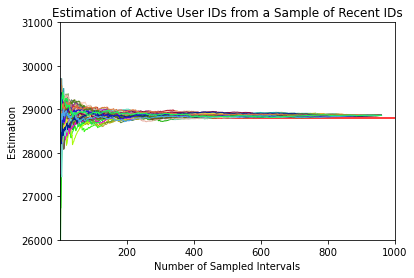

In [85]:
# We create an array of the number of samples for each estimation to be calculated.
sample_indexes_2 = list(range(len(densities_2)+1))
sample_indexes_2.remove(0)

# This creates the ground truth line
x_2 = [0,len(densities_2)+200]
y_2 = [total_number_of_active_users_2,total_number_of_active_users_2]

plt.plot(x_2,y_2, color='red')

# Here, we run 40 iterations of our random sampling technique.
for y in range(40):
    # Picks a random order of the sampled intervals
    samples_2 = random.sample(range(len(densities_2)),len(densities_2))
    sampled_estimations_2 = []
    sum_of_densities_2 = 0
    for x in range(len(samples_2)):
        # Keeps track of the total sum of densities
        sum_of_densities_2 += densities_2[samples_2[x]]

        # Calculates the estimation at this instance with this number of sampled intervals
        sampled_estimations_2.append((total_range_2/sample_indexes_2[x])*sum_of_densities_2)
    
    # Randomly generates a color for each line in the plot to avoid a blob  
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    # Plots the number of sampled indexes against the estimation
    plt.plot(sample_indexes_2, sampled_estimations_2, color=color, linewidth = 1) 
  
plt.xlabel('Number of Sampled Intervals')
plt.ylabel('Estimation') 
plt.title('Estimation of Active User IDs from a Sample of Recent IDs')

  
# setting x and y axis range 
plt.ylim(26000,31000) 
plt.xlim(1,1000)

plt.show() 